# Analyzing scaling with mass 
October 13, 2021 
Venkitesh Ayyar

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
%matplotlib widget

In [38]:
# Load dat
df1=pd.DataFrame([])
lst=['tl_0lvl','tl_1lvl','tl_2lvl','tl_3lvl','tl_4lvl']

fname='../3_complex_scalar_nontelescoping/results_files/results_scaling.txt'
fname='../3_complex_scalar_nontelescoping/results_files/results_scaling.txt'


# a1=np.loadtxt(fname,delimiter='\t')
cols=['L','n_per_level','m','blk_x','blk_y','ndof','levels','conv_iters']
df=pd.read_csv(fname,delimiter='\t',names=cols)
df=df.sort_values(by=['levels','n_per_level','L','m']).reset_index(drop=True)
df['run_type']='lvl_'+df['levels'].astype(str)+'_blk_'+df['blk_x'].astype(str)
df1=df.copy()
df1

,L,n_per_level,m,blk_x,blk_y,ndof,levels,conv_iters,run_type
0,32,3,0.02,4,4,8,0,3863,lvl_0_blk_4
1,32,3,0.02,2,2,2,0,3863,lvl_0_blk_2
2,32,3,0.05,2,2,2,0,2655,lvl_0_blk_2
3,32,3,0.05,4,4,8,0,2655,lvl_0_blk_4
4,32,3,0.10,2,2,2,0,1257,lvl_0_blk_2
5,32,3,0.10,4,4,8,0,1257,lvl_0_blk_4
6,32,3,0.20,2,2,2,0,407,lvl_0_blk_2
7,32,3,0.20,4,4,8,0,407,lvl_0_blk_4
8,32,3,0.50,2,2,2,0,74,lvl_0_blk_2
9,32,3,0.02,4,4,8,1,662,lvl_1_blk_4


In [39]:
df2=df1[['run_type','m','conv_iters','blk_x']]
df2

,run_type,m,conv_iters,blk_x
0,lvl_0_blk_4,0.02,3863,4
1,lvl_0_blk_2,0.02,3863,2
2,lvl_0_blk_2,0.05,2655,2
3,lvl_0_blk_4,0.05,2655,4
4,lvl_0_blk_2,0.10,1257,2
5,lvl_0_blk_4,0.10,1257,4
6,lvl_0_blk_2,0.20,407,2
7,lvl_0_blk_4,0.20,407,4
8,lvl_0_blk_2,0.50,74,2
9,lvl_1_blk_4,0.02,662,4


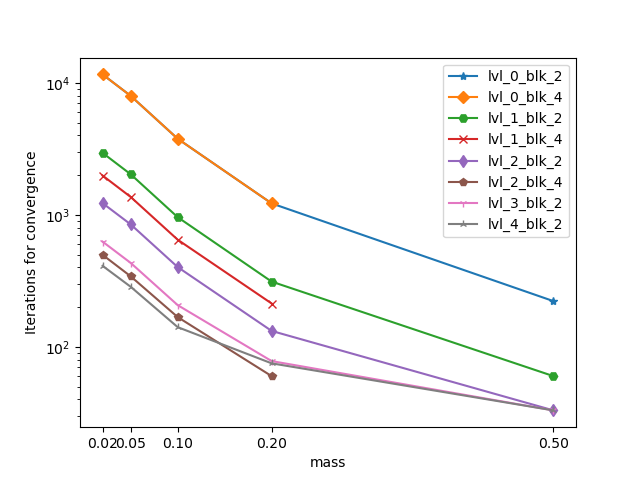

In [40]:
labels=np.unique(df2.run_type.values)
plt.figure()
for i,marker in zip(labels,['*','D','H','x','d','p','1','2','h','v']):
    df=df2[df2.run_type==i][['m','conv_iters']]
    # display(df)
    plt.plot(df.m.values,df.conv_iters.values*3,label=i,marker=marker)
plt.xticks(df.m.values)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('mass')
plt.ylabel('Iterations for convergence')
plt.legend()
plt.show()

In [41]:
df2[df2.run_type=='lvl_4_blk_2']

,run_type,m,conv_iters,blk_x
32,lvl_4_blk_2,0.02,137,2
33,lvl_4_blk_2,0.05,95,2
34,lvl_4_blk_2,0.10,47,2
35,lvl_4_blk_2,0.20,25,2
36,lvl_4_blk_2,0.50,11,2


['lvl_0_blk_2' 'lvl_0_blk_4' 'lvl_1_blk_2' 'lvl_1_blk_4' 'lvl_2_blk_2'
 'lvl_2_blk_4' 'lvl_3_blk_2' 'lvl_4_blk_2']


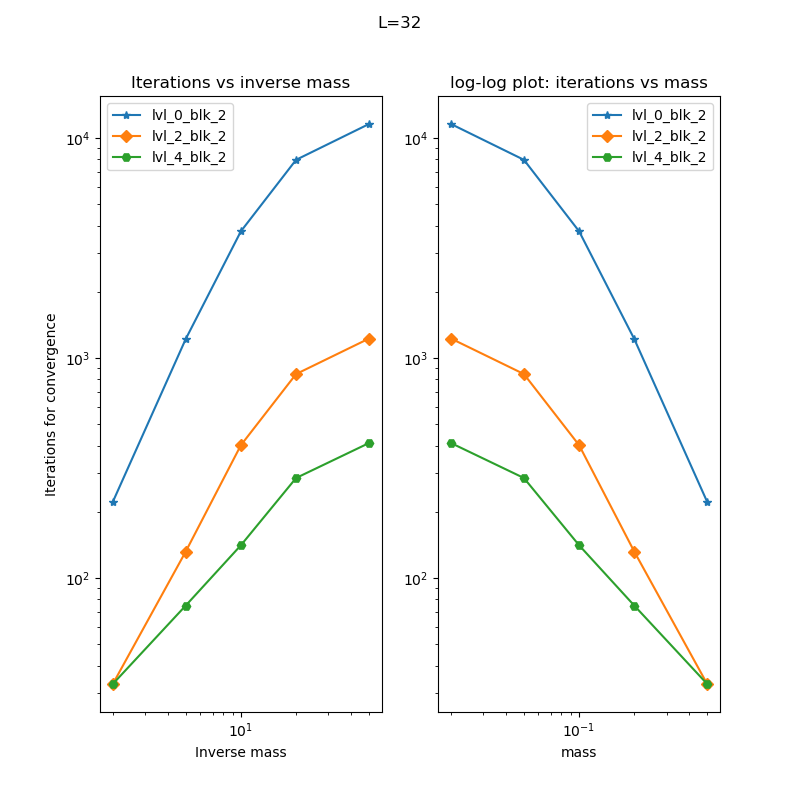

In [35]:
labels=np.unique(df2.run_type.values)
print(labels)
labels=['lvl_0_blk_2','lvl_2_blk_2','lvl_4_blk_2']

fig=plt.figure(figsize=(8,8))
fig.add_subplot(1,2,1)
for i,marker in zip(labels,['*','D','H','x','d','p','1','2','h','v']):
    df=df2[df2.run_type==i][['m','conv_iters']]
    # display(df)
    x=1.0/df.m.values
    y=df.conv_iters.values*3
    plt.plot(x,y,label=i,marker=marker)
plt.xticks(df.m.values)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Inverse mass')
plt.ylabel('Iterations for convergence')
plt.legend()
plt.title('Iterations vs inverse mass')

fig.add_subplot(1,2,2)
for i,marker in zip(labels,['*','D','H','x','d','p','1','2','h','v']):
    df=df2[df2.run_type==i][['m','conv_iters']]
    # display(df)
    x=df.m.values
    y=df.conv_iters.values*3
    plt.plot(x,y,label=i,marker=marker)
plt.xticks(df.m.values)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('mass')
# plt.ylabel('Iterations for convergence')
plt.legend()

plt.title('log-log plot: iterations vs mass')
plt.suptitle('L=%s'%(L))
plt.show()


In [6]:
32**2 * 2

2048

In [7]:
64**2 * 2

8192